In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('Downloads/python-for-ml-and-ds-projects/data/spam.tsv',sep='\t')

In [3]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
print('null: ',df.isnull().sum())
df.info()

null:  label      0
message    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/c4/c5/1a4556a372ce1bd53f183d583126a6535cae6baa1b09b7028faf018c8a67/spacy-3.7.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/7a/05/4a3b5c3043c6d84c00bf0f574d326660702b1c10174fe6b44cef3c3dff08/murmurhash-1.0.10-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/p

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 4.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.4/488.4 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.1/781.1 kB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 4.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.7/184.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 9.0 MB/s eta 0:00:00ta 0:00:01


In [8]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /private/var/folders/kw/6gkydlyd5rv36gdrf5d_7nzc0000gn/T/pip-req-build-s53535j3
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /private/var/folders/kw/6gkydlyd5rv36gdrf5d_7nzc0000gn/T/pip-req-build-s53535j3
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=bd2d52312e279bdc3605b6719346278ad5438c37331e557737ed62e28f1bdbc1
  Stored in directory: /private/var/folders/kw/6gkydlyd5rv36gdrf5d_7nzc0000gn/T/pip-ephem-wheel-cache-_3__09gj/wheels/74/fe/05/0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess-kgptalkie
Note: you may need to restart the kernel to use updated packages.


In [10]:
import preprocess_kgptalkie as kgp

In [13]:
df['wordcounts'] =  df['message'].apply(lambda x: kgp.get_wordcounts(x))
df['charcounts'] = df['message'].apply(lambda x: kgp.get_charcounts(x))
                   
df['avg_wordlength'] = df['message'].apply(lambda x: kgp.get_avg_wordlength(x))
df['stop_wrodcount'] = df['message'].apply(lambda x: kgp.get_stopwords_counts(x))

df['digit_count'] = df['message'].apply(lambda x: kgp.get_digit_counts(x))
df['uppercase_count'] = df['message'].apply(lambda x: kgp.get_uppercase_counts(x))

/Users/ayushmohite/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayushmohite/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayushmohite/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayushmohite/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

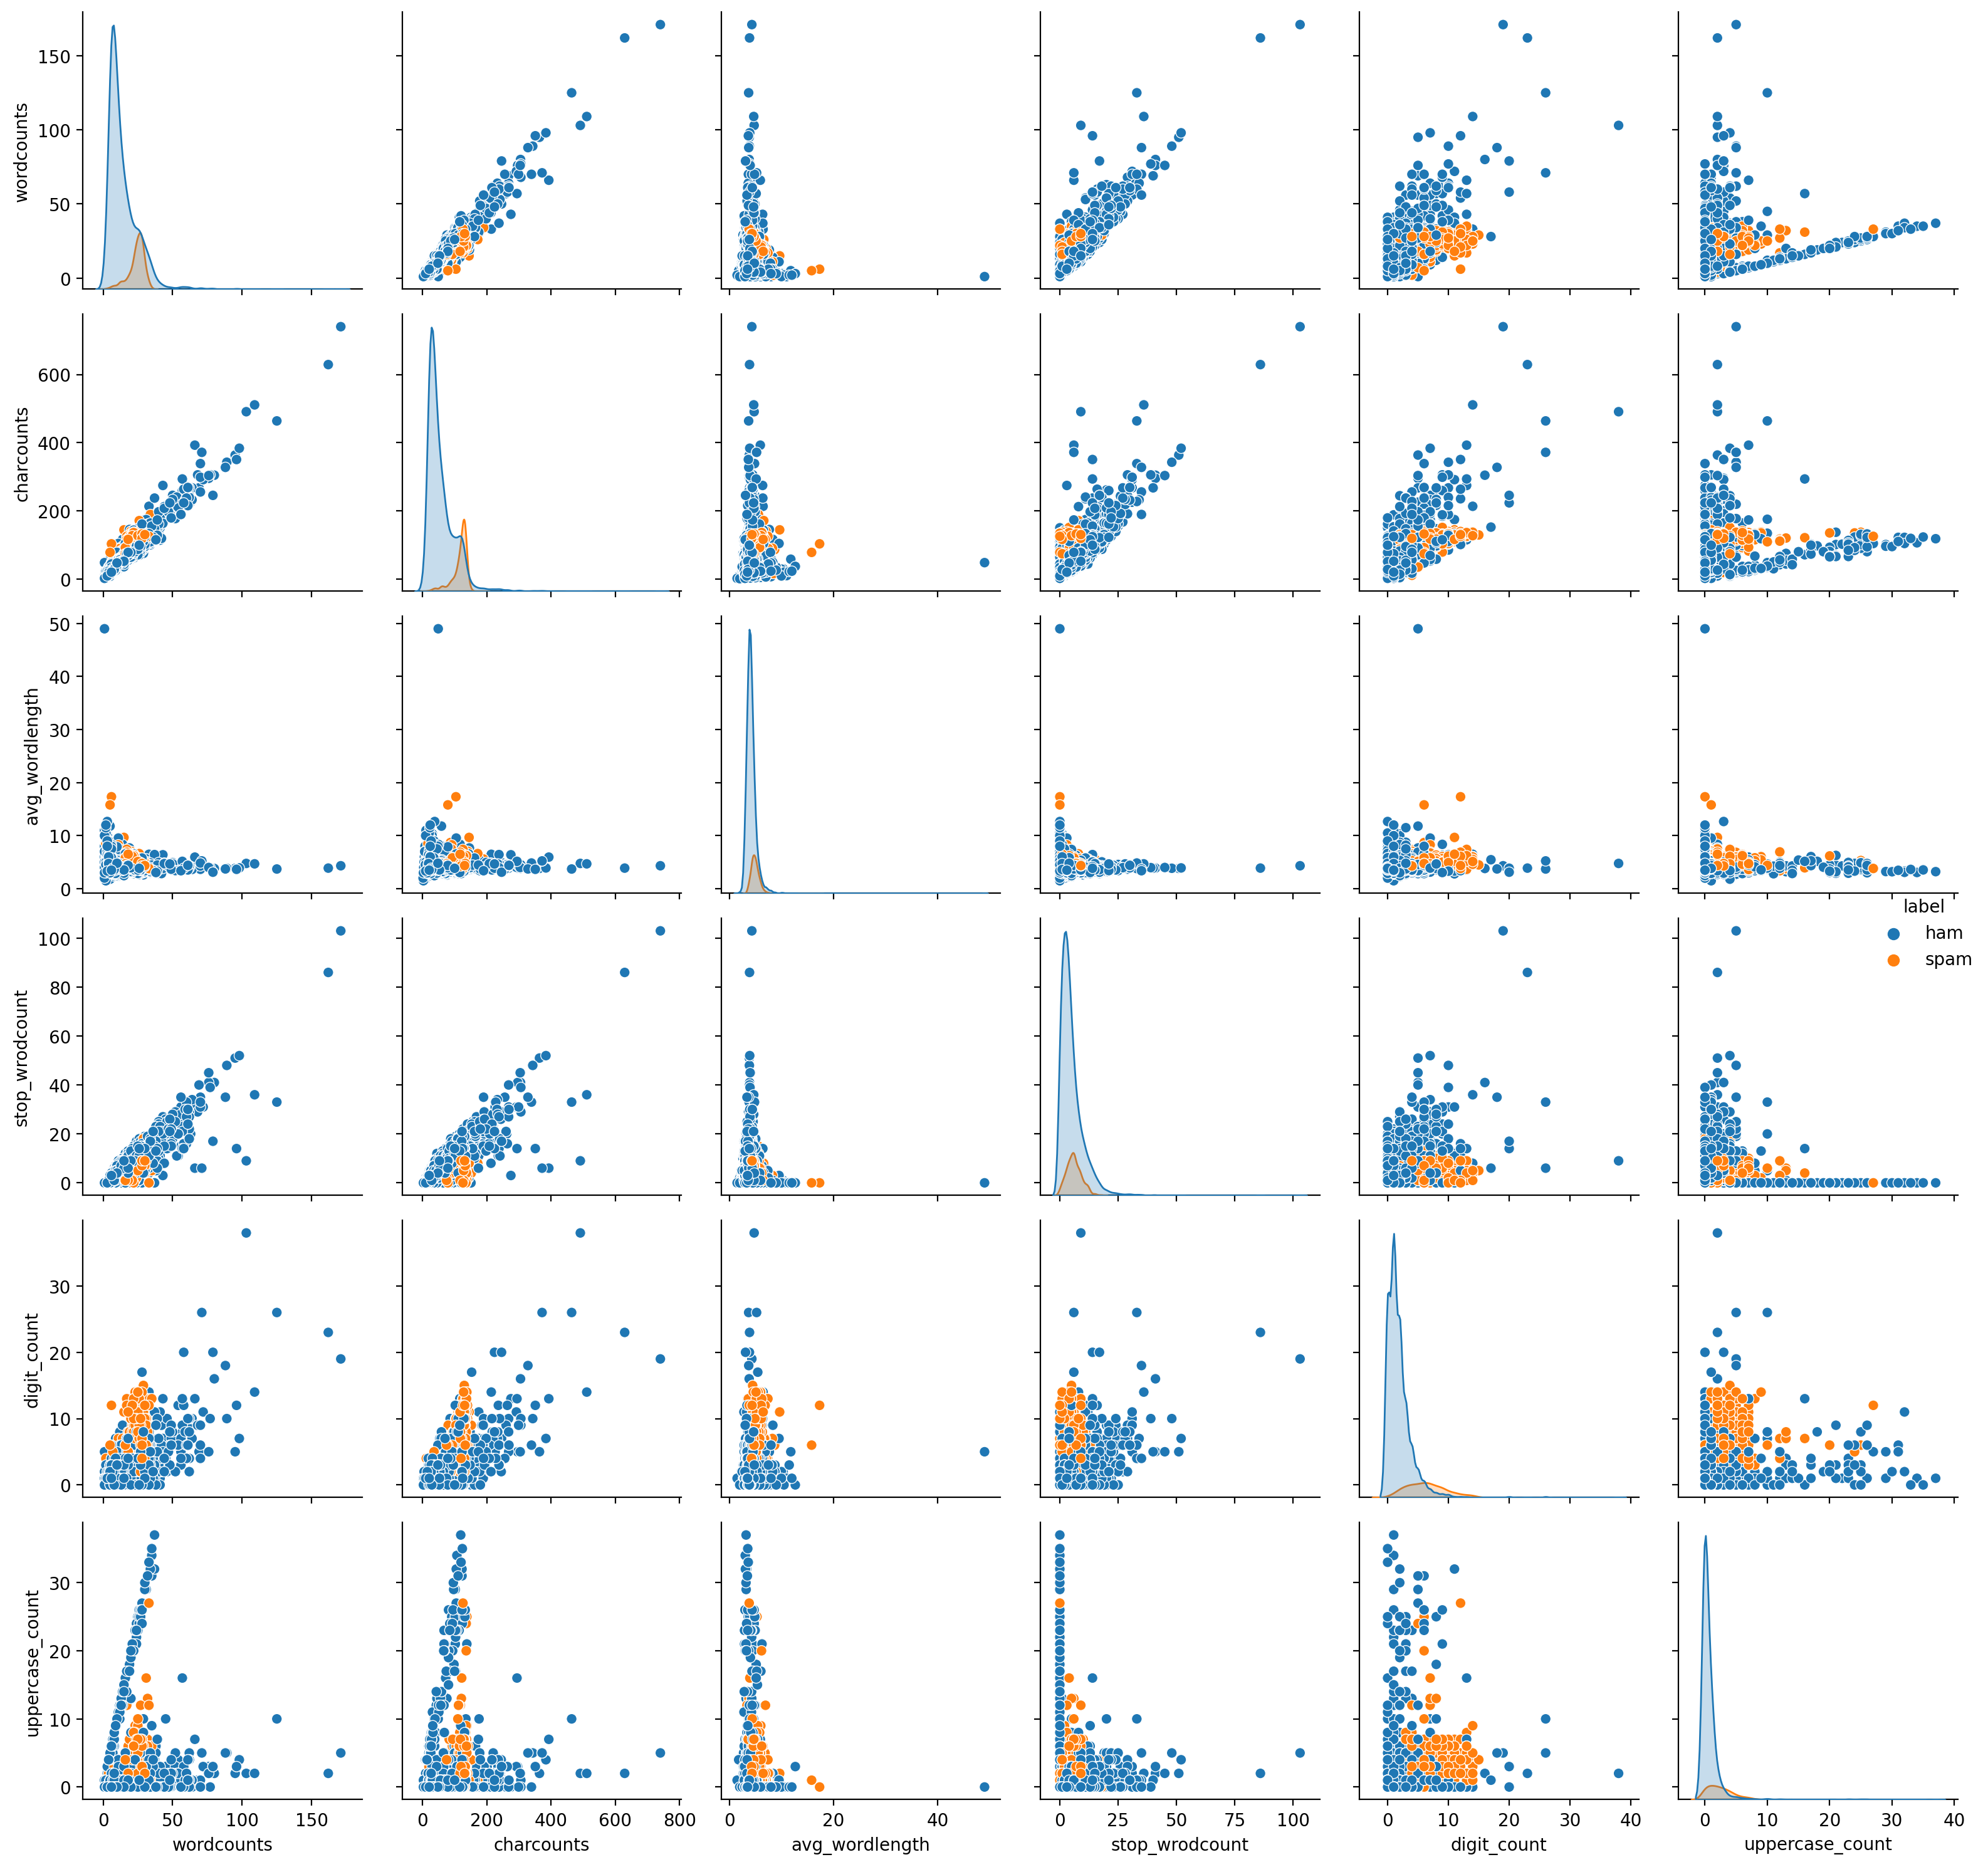

In [19]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (20,14)
sns.pairplot(df, hue='label')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(df['message'],df['label'],test_size=0.2,stratify=df['label'])

In [23]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4457,), (4457,), (1115,), (1115,))

## TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
idf=TfidfVectorizer()
x_train=idf.fit_transform(x_train)
x_test=idf.transform(x_test)


In [29]:
print(len(idf.get_feature_names_out()))
idf.get_feature_names_out()

7709


array(['00', '000', '008704050406', ..., 'zyada', 'èn', '〨ud'],
      dtype=object)

## model building

In [34]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [31]:
svm=LinearSVC()
svm.fit(x_train,y_train)

/Users/ayushmohite/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [32]:
y_pred=svm.predict(x_test)

In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       977
        spam       0.91      0.98      0.94       138

    accuracy                           0.98      1115
   macro avg       0.95      0.98      0.97      1115
weighted avg       0.99      0.98      0.99      1115



In [42]:
text=['hey what is up, man?']
text=idf.transform(text)
text.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [43]:
svm.predict(text)

array(['ham'], dtype=object)

In [48]:
spam=['zomato is giving a donut with an order just for you !']
spam=idf.transform(spam)
spam.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [49]:
svm.predict(spam)

array(['spam'], dtype=object)

## Model Load & Store

In [50]:
import pickle
import os

In [51]:
os.makedirs('model_spam_detection',exist_ok=True)

In [53]:
pickle.dump(idf,open('model_spam_detection/tfidf.pkl','wb'))
pickle.dump(svm,open('model_spam_detection/svm.pkl','wb'))

In [55]:
idf1=pickle.load(open('model_spam_detection/tfidf.pkl','rb'))
svm1=pickle.load(open('model_spam_detection/svm.pkl','rb'))

In [58]:
spam=['yes,we care so here is a free donut with an order just for you !']
spam=idf1.transform(spam)
spam.toarray()
svm1.predict(spam)

array(['spam'], dtype=object)